# 统计学习导论第十三次作业
作业任务：CNN

姓名：欧阳瑞志、班级：统计22、学号：220403102

## 一、数据导入
##### 数据来源
keras自带的的手写数字识别【MNIST手写数字识别】
##### 主题
有60,000个用于训练的28*28的灰度手写数字图片，10,000个测试图片

In [3]:
####--------------------------------统计学习导论第十三次作业——CNN卷积神经网络--------------------------------####

from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,GaussianNoise
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score


#--------------------------------1、数据导入--------------------------------#
# keras自带的的手写数字识别【MNIST手写数字识别】
# 有60,000个用于训练的28*28的灰度手写数字图片，10,000个测试图片

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

## 二、参数调整
网络结构：卷积-池化-噪声-展开-输出
### 2.1 Batch size
网格搜索 batch size考虑 32、64、128、256、512、1024、2048

In [4]:
# 定义神经网络
def cnn():
    model = Sequential()
    # 卷积层
    model.add(Conv2D(10, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 池化层
    model.add(MaxPool2D(pool_size=(2, 2)))
    # 噪声层
    model.add(GaussianNoise(0.1))
    # 展平层
    model.add(Flatten())
    # 全连接层
    model.add(Dense(512, activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 全连接层
    model.add(Dense(num_classes, activation='softmax'))
    return model

# 创建RBF模型实例
cnn = cnn()

# 输出模型结构
print(cnn.summary())

# 编译模型，选择合适的优化器、学习率和损失函数
learning_rate = 0.001
cnn.compile(optimizer=optimizers.legacy.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['acc'] )

## 参数
early_stopping_patience = 3
epoch = 10
batch_size = 32

# 训练模型
# 早停法--验证集损失连续3个epoch没有改善就停止训练
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)
history = cnn.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, validation_split = 0.25, callbacks=early_stopping)

# 在测试集上评估模型
y_pred_test = cnn.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('测试集MSE:', mse_test)
rmse_test= np.sqrt(mse_test)
print('测试集RMSE:', rmse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print('测试集MAE:', mae_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print('测试集MAPE:', mape_test)
r2_test = r2_score(y_test, y_pred_test)
print('测试集R2:', r2_test)

print('###################---------------------batch size 32 done------------------------####################')

# 定义神经网络
def cnn():
    model = Sequential()
    # 卷积层
    model.add(Conv2D(10, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 池化层
    model.add(MaxPool2D(pool_size=(2, 2)))
    # 噪声层
    model.add(GaussianNoise(0.1))
    # 展平层
    model.add(Flatten())
    # 全连接层
    model.add(Dense(512, activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 全连接层
    model.add(Dense(num_classes, activation='softmax'))
    return model

# 创建RBF模型实例
cnn = cnn()

# 输出模型结构
print(cnn.summary())

# 编译模型，选择合适的优化器、学习率和损失函数
learning_rate = 0.001
cnn.compile(optimizer=optimizers.legacy.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['acc'] )

## 参数
early_stopping_patience = 3
epoch = 10
batch_size = 64

# 训练模型
# 早停法--验证集损失连续3个epoch没有改善就停止训练
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)
history = cnn.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, validation_split = 0.25, callbacks=early_stopping)

# 在测试集上评估模型
y_pred_test = cnn.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('测试集MSE:', mse_test)
rmse_test= np.sqrt(mse_test)
print('测试集RMSE:', rmse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print('测试集MAE:', mae_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print('测试集MAPE:', mape_test)
r2_test = r2_score(y_test, y_pred_test)
print('测试集R2:', r2_test)

print('###################---------------------batch size 64 done------------------------####################')

# 定义神经网络
def cnn():
    model = Sequential()
    # 卷积层
    model.add(Conv2D(10, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 池化层
    model.add(MaxPool2D(pool_size=(2, 2)))
    # 噪声层
    model.add(GaussianNoise(0.1))
    # 展平层
    model.add(Flatten())
    # 全连接层
    model.add(Dense(512, activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 全连接层
    model.add(Dense(num_classes, activation='softmax'))
    return model

# 创建RBF模型实例
cnn = cnn()

# 输出模型结构
print(cnn.summary())

# 编译模型，选择合适的优化器、学习率和损失函数
learning_rate = 0.001
cnn.compile(optimizer=optimizers.legacy.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['acc'] )

## 参数
early_stopping_patience = 3
epoch = 10
batch_size = 128

# 训练模型
# 早停法--验证集损失连续3个epoch没有改善就停止训练
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)
history = cnn.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, validation_split = 0.25, callbacks=early_stopping)

# 在测试集上评估模型
y_pred_test = cnn.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('测试集MSE:', mse_test)
rmse_test= np.sqrt(mse_test)
print('测试集RMSE:', rmse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print('测试集MAE:', mae_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print('测试集MAPE:', mape_test)
r2_test = r2_score(y_test, y_pred_test)
print('测试集R2:', r2_test)

print('###################---------------------batch size 128 done------------------------####################')

# 定义神经网络
def cnn():
    model = Sequential()
    # 卷积层
    model.add(Conv2D(10, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 池化层
    model.add(MaxPool2D(pool_size=(2, 2)))
    # 噪声层
    model.add(GaussianNoise(0.1))
    # 展平层
    model.add(Flatten())
    # 全连接层
    model.add(Dense(512, activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 全连接层
    model.add(Dense(num_classes, activation='softmax'))
    return model

# 创建RBF模型实例
cnn = cnn()

# 输出模型结构
print(cnn.summary())

# 编译模型，选择合适的优化器、学习率和损失函数
learning_rate = 0.001
cnn.compile(optimizer=optimizers.legacy.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['acc'] )

## 参数
early_stopping_patience = 3
epoch = 10
batch_size = 256

# 训练模型
# 早停法--验证集损失连续3个epoch没有改善就停止训练
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)
history = cnn.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, validation_split = 0.25, callbacks=early_stopping)

# 在测试集上评估模型
y_pred_test = cnn.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('测试集MSE:', mse_test)
rmse_test= np.sqrt(mse_test)
print('测试集RMSE:', rmse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print('测试集MAE:', mae_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print('测试集MAPE:', mape_test)
r2_test = r2_score(y_test, y_pred_test)
print('测试集R2:', r2_test)

print('###################---------------------batch size 256 done------------------------####################')

# 定义神经网络
def cnn():
    model = Sequential()
    # 卷积层
    model.add(Conv2D(10, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 池化层
    model.add(MaxPool2D(pool_size=(2, 2)))
    # 噪声层
    model.add(GaussianNoise(0.1))
    # 展平层
    model.add(Flatten())
    # 全连接层
    model.add(Dense(512, activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 全连接层
    model.add(Dense(num_classes, activation='softmax'))
    return model

# 创建RBF模型实例
cnn = cnn()

# 输出模型结构
print(cnn.summary())

# 编译模型，选择合适的优化器、学习率和损失函数
learning_rate = 0.001
cnn.compile(optimizer=optimizers.legacy.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['acc'] )

## 参数
early_stopping_patience = 3
epoch = 10
batch_size = 512

# 训练模型
# 早停法--验证集损失连续3个epoch没有改善就停止训练
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)
history = cnn.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, validation_split = 0.25, callbacks=early_stopping)

# 在测试集上评估模型
y_pred_test = cnn.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('测试集MSE:', mse_test)
rmse_test= np.sqrt(mse_test)
print('测试集RMSE:', rmse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print('测试集MAE:', mae_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print('测试集MAPE:', mape_test)
r2_test = r2_score(y_test, y_pred_test)
print('测试集R2:', r2_test)

print('###################---------------------batch size 512 done------------------------####################')


# 定义神经网络
def cnn():
    model = Sequential()
    # 卷积层
    model.add(Conv2D(10, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 池化层
    model.add(MaxPool2D(pool_size=(2, 2)))
    # 噪声层
    model.add(GaussianNoise(0.1))
    # 展平层
    model.add(Flatten())
    # 全连接层
    model.add(Dense(512, activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 全连接层
    model.add(Dense(num_classes, activation='softmax'))
    return model

# 创建RBF模型实例
cnn = cnn()

# 输出模型结构
print(cnn.summary())

# 编译模型，选择合适的优化器、学习率和损失函数
learning_rate = 0.001
cnn.compile(optimizer=optimizers.legacy.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['acc'] )

## 参数
early_stopping_patience = 3
epoch = 10
batch_size = 1024

# 训练模型
# 早停法--验证集损失连续3个epoch没有改善就停止训练
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)
history = cnn.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, validation_split = 0.25, callbacks=early_stopping)

# 在测试集上评估模型
y_pred_test = cnn.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('测试集MSE:', mse_test)
rmse_test= np.sqrt(mse_test)
print('测试集RMSE:', rmse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print('测试集MAE:', mae_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print('测试集MAPE:', mape_test)
r2_test = r2_score(y_test, y_pred_test)
print('测试集R2:', r2_test)

print('###################---------------------batch size 1024 done------------------------####################')


# 定义神经网络
def cnn():
    model = Sequential()
    # 卷积层
    model.add(Conv2D(10, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 池化层
    model.add(MaxPool2D(pool_size=(2, 2)))
    # 噪声层
    model.add(GaussianNoise(0.1))
    # 展平层
    model.add(Flatten())
    # 全连接层
    model.add(Dense(512, activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 全连接层
    model.add(Dense(num_classes, activation='softmax'))
    return model

# 创建RBF模型实例
cnn = cnn()

# 输出模型结构
print(cnn.summary())

# 编译模型，选择合适的优化器、学习率和损失函数
learning_rate = 0.001
cnn.compile(optimizer=optimizers.legacy.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['acc'] )

## 参数
early_stopping_patience = 3
epoch = 10
batch_size = 2048

# 训练模型
# 早停法--验证集损失连续3个epoch没有改善就停止训练
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)
history = cnn.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, validation_split = 0.25, callbacks=early_stopping)

# 在测试集上评估模型
y_pred_test = cnn.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('测试集MSE:', mse_test)
rmse_test= np.sqrt(mse_test)
print('测试集RMSE:', rmse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print('测试集MAE:', mae_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print('测试集MAPE:', mape_test)
r2_test = r2_score(y_test, y_pred_test)
print('测试集R2:', r2_test)

print('###################---------------------batch size 2048 done------------------------####################')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 10)        40        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 10)        0         
 D)                                                              
                                                                 
 gaussian_noise (GaussianNo  (None, 13, 13, 10)        0         
 ise)                                                            
                                                                 
 flatten (Flatten)           (None, 1690)              0         
                                                        

__最佳batch size为256__

### 2.2 学习率
网格搜索0.001，0.005，0.01，0.05，0.1

In [5]:
# 定义神经网络
def cnn():
    model = Sequential()
    # 卷积层
    model.add(Conv2D(10, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 池化层
    model.add(MaxPool2D(pool_size=(2, 2)))
    # 噪声层
    model.add(GaussianNoise(0.1))
    # 展平层
    model.add(Flatten())
    # 全连接层
    model.add(Dense(512, activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 全连接层
    model.add(Dense(num_classes, activation='softmax'))
    return model

# 创建RBF模型实例
cnn = cnn()

# 输出模型结构
print(cnn.summary())

# 编译模型，选择合适的优化器、学习率和损失函数
learning_rate = 0.001
cnn.compile(optimizer=optimizers.legacy.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['acc'] )

## 参数
early_stopping_patience = 3
epoch = 10
batch_size = 256

# 训练模型
# 早停法--验证集损失连续3个epoch没有改善就停止训练
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)
history = cnn.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, validation_split = 0.25, callbacks=early_stopping)

# 在测试集上评估模型
y_pred_test = cnn.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('测试集MSE:', mse_test)
rmse_test= np.sqrt(mse_test)
print('测试集RMSE:', rmse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print('测试集MAE:', mae_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print('测试集MAPE:', mape_test)
r2_test = r2_score(y_test, y_pred_test)
print('测试集R2:', r2_test)

print('###################---------------------learning rate 0.001 done------------------------####################')

# 定义神经网络
def cnn():
    model = Sequential()
    # 卷积层
    model.add(Conv2D(10, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 池化层
    model.add(MaxPool2D(pool_size=(2, 2)))
    # 噪声层
    model.add(GaussianNoise(0.1))
    # 展平层
    model.add(Flatten())
    # 全连接层
    model.add(Dense(512, activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 全连接层
    model.add(Dense(num_classes, activation='softmax'))
    return model

# 创建RBF模型实例
cnn = cnn()

# 输出模型结构
print(cnn.summary())

# 编译模型，选择合适的优化器、学习率和损失函数
learning_rate = 0.005
cnn.compile(optimizer=optimizers.legacy.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['acc'] )

## 参数
early_stopping_patience = 3
epoch = 10
batch_size = 256

# 训练模型
# 早停法--验证集损失连续3个epoch没有改善就停止训练
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)
history = cnn.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, validation_split = 0.25, callbacks=early_stopping)

# 在测试集上评估模型
y_pred_test = cnn.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('测试集MSE:', mse_test)
rmse_test= np.sqrt(mse_test)
print('测试集RMSE:', rmse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print('测试集MAE:', mae_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print('测试集MAPE:', mape_test)
r2_test = r2_score(y_test, y_pred_test)
print('测试集R2:', r2_test)

print('###################---------------------learning rate 0.005 done------------------------####################')

# 定义神经网络
def cnn():
    model = Sequential()
    # 卷积层
    model.add(Conv2D(10, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 池化层
    model.add(MaxPool2D(pool_size=(2, 2)))
    # 噪声层
    model.add(GaussianNoise(0.1))
    # 展平层
    model.add(Flatten())
    # 全连接层
    model.add(Dense(512, activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 全连接层
    model.add(Dense(num_classes, activation='softmax'))
    return model

# 创建RBF模型实例
cnn = cnn()

# 输出模型结构
print(cnn.summary())

# 编译模型，选择合适的优化器、学习率和损失函数
learning_rate = 0.01
cnn.compile(optimizer=optimizers.legacy.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['acc'] )

## 参数
early_stopping_patience = 3
epoch = 10
batch_size = 256

# 训练模型
# 早停法--验证集损失连续3个epoch没有改善就停止训练
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)
history = cnn.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, validation_split = 0.25, callbacks=early_stopping)

# 在测试集上评估模型
y_pred_test = cnn.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('测试集MSE:', mse_test)
rmse_test= np.sqrt(mse_test)
print('测试集RMSE:', rmse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print('测试集MAE:', mae_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print('测试集MAPE:', mape_test)
r2_test = r2_score(y_test, y_pred_test)
print('测试集R2:', r2_test)

print('###################---------------------learning rate 0.01 done------------------------####################')

# 定义神经网络
def cnn():
    model = Sequential()
    # 卷积层
    model.add(Conv2D(10, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 池化层
    model.add(MaxPool2D(pool_size=(2, 2)))
    # 噪声层
    model.add(GaussianNoise(0.1))
    # 展平层
    model.add(Flatten())
    # 全连接层
    model.add(Dense(512, activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 全连接层
    model.add(Dense(num_classes, activation='softmax'))
    return model

# 创建RBF模型实例
cnn = cnn()

# 输出模型结构
print(cnn.summary())

# 编译模型，选择合适的优化器、学习率和损失函数
learning_rate = 0.05
cnn.compile(optimizer=optimizers.legacy.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['acc'] )

## 参数
early_stopping_patience = 3
epoch = 10
batch_size = 256

# 训练模型
# 早停法--验证集损失连续3个epoch没有改善就停止训练
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)
history = cnn.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, validation_split = 0.25, callbacks=early_stopping)

# 在测试集上评估模型
y_pred_test = cnn.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('测试集MSE:', mse_test)
rmse_test= np.sqrt(mse_test)
print('测试集RMSE:', rmse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print('测试集MAE:', mae_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print('测试集MAPE:', mape_test)
r2_test = r2_score(y_test, y_pred_test)
print('测试集R2:', r2_test)

print('###################---------------------learning rate 0.05 done------------------------####################')

# 定义神经网络
def cnn():
    model = Sequential()
    # 卷积层
    model.add(Conv2D(10, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 池化层
    model.add(MaxPool2D(pool_size=(2, 2)))
    # 噪声层
    model.add(GaussianNoise(0.1))
    # 展平层
    model.add(Flatten())
    # 全连接层
    model.add(Dense(512, activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 全连接层
    model.add(Dense(num_classes, activation='softmax'))
    return model

# 创建RBF模型实例
cnn = cnn()

# 输出模型结构
print(cnn.summary())

# 编译模型，选择合适的优化器、学习率和损失函数
learning_rate = 0.1
cnn.compile(optimizer=optimizers.legacy.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['acc'] )

## 参数
early_stopping_patience = 3
epoch = 10
batch_size = 256

# 训练模型
# 早停法--验证集损失连续3个epoch没有改善就停止训练
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)
history = cnn.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, validation_split = 0.25, callbacks=early_stopping)

# 在测试集上评估模型
y_pred_test = cnn.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('测试集MSE:', mse_test)
rmse_test= np.sqrt(mse_test)
print('测试集RMSE:', rmse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print('测试集MAE:', mae_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print('测试集MAPE:', mape_test)
r2_test = r2_score(y_test, y_pred_test)
print('测试集R2:', r2_test)

print('###################---------------------learning rate 0.1 done------------------------####################')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 batch_normalization_14 (Ba  (None, 26, 26, 10)        40        
 tchNormalization)                                               
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 10)        0         
 g2D)                                                            
                                                                 
 gaussian_noise_7 (Gaussian  (None, 13, 13, 10)        0         
 Noise)                                                          
                                                                 
 flatten_7 (Flatten)         (None, 1690)              0         
                                                      

__最佳学习率0.001__

## 三、模型预测
将测试集中1的图像进行平移变换，并预测平移后的图像
### 3.1 最佳模型

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 batch_normalization_24 (Ba  (None, 26, 26, 10)        40        
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 10)        0         
 ng2D)                                                           
                                                                 
 gaussian_noise_12 (Gaussia  (None, 13, 13, 10)        0         
 nNoise)                                                         
                                                                 
 flatten_12 (Flatten)        (None, 1690)              0         
                                                     

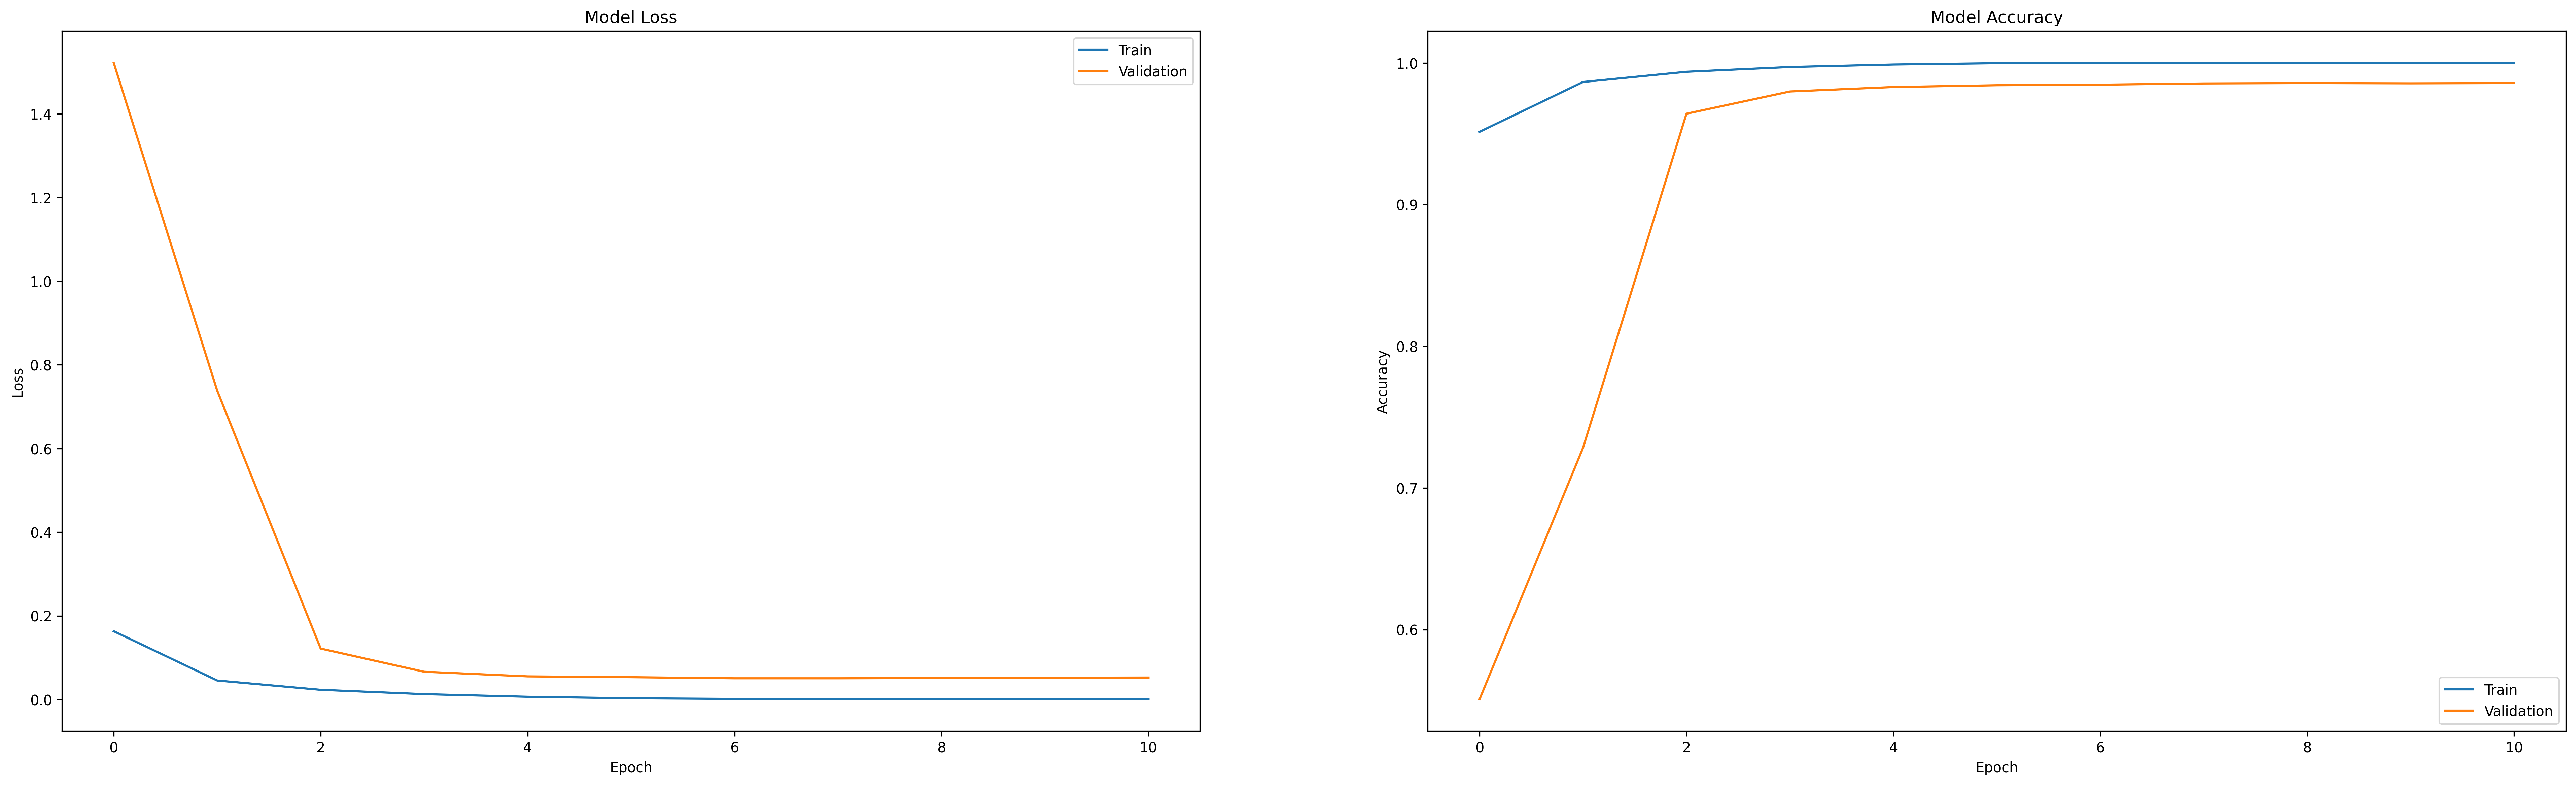

In [8]:

# 定义神经网络
def cnn():
    model = Sequential()
    # 卷积层
    model.add(Conv2D(10, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 池化层
    model.add(MaxPool2D(pool_size=(2, 2)))
    # 噪声层
    model.add(GaussianNoise(0.1))
    # 展平层
    model.add(Flatten())
    # 全连接层
    model.add(Dense(512, activation='relu'))
    # 批量归一化
    model.add(BatchNormalization())
    # 全连接层
    model.add(Dense(num_classes, activation='softmax'))
    return model

# 创建RBF模型实例
cnn = cnn()

# 输出模型结构
print(cnn.summary())

# 编译模型，选择合适的优化器、学习率和损失函数
learning_rate = 0.001
cnn.compile(optimizer=optimizers.legacy.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['acc'] )

## 参数
early_stopping_patience = 3
epoch = 20
batch_size = 256

# 训练模型
# 早停法--验证集损失连续3个epoch没有改善就停止训练
early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)
history = cnn.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, validation_split = 0.25, callbacks=early_stopping)

# 绘制训练和验证损失曲线以及准确率曲线在1*2的子图中
plt.figure(figsize=(32, 9), dpi=300)
# 损失曲线
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
# 准确率曲线
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.savefig(fname='训练及验证曲线.png')

# 在测试集上评估模型
y_pred_test = cnn.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('测试集MSE:', mse_test)
rmse_test= np.sqrt(mse_test)
print('测试集RMSE:', rmse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print('测试集MAE:', mae_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print('测试集MAPE:', mape_test)
r2_test = r2_score(y_test, y_pred_test)
print('测试集R2:', r2_test)

好像还存在一点点过拟合
## 3.2 模型预测

In [9]:
# 获取标签为1的所有图像输入
x_test1 = x_test[y_test[:, 1]==1]
# 利用所有标签为1的图像生成均值图像
pic = np.zeros((x_test.shape[1], x_test.shape[2]))
pic2 = np.copy(pic)
for i in range(x_test1.shape[0]):
    pic2 = x_test1[i, :, :, 0]
pic = pic + pic2
pic = (pic / x_test1.shape[0])
# 将均值图像中的每个像素向左平移一个像素
for i in range(pic.shape[0]):
    if i < 21:
        pic[:, i] = pic[:, i+1]
# 对平移后的图像进行预测
p = cnn.predict(pic.reshape(1, x_test.shape[1], x_test.shape[2], 1))
print(p)
c = np.argmax(p)
print('CNN预测结果：', c)

1/1 [==============================] - 0s 19ms/step
[[1.3359324e-06 9.9988818e-01 1.3698642e-07 9.5579500e-10 3.6954569e-07
  4.9700238e-06 1.6569905e-07 1.0477568e-04 9.8181845e-14 5.7163985e-10]]
CNN预测结果： 1
